In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taksa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df = pd.read_csv('Resume_Data.csv')

In [8]:
df = df.drop(['Unnamed: 0.1'], axis=1)

In [9]:
df.head()

,Unnamed: 0,ID,Resume_str,Category
0,0,13701259,SENIOR ACCOUNTANT Summary Senior Accounting Pr...,ACCOUNTANT
1,1,14055988,ACCOUNTANT III Summary Talented Accountant Â e...,ACCOUNTANT
2,2,14126433,SUPERVISOR ACCOUNTANT Professional Summary Abi...,ACCOUNTANT
3,3,14224370,ACCOUNTANT Summary Degreed accountant with mor...,ACCOUNTANT
4,4,14449423,STAFF ACCOUNTANT Professional Profile To advan...,ACCOUNTANT


In [3]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    

    return ' '.join(txt)

In [11]:
df['Resume_str'] = df['Resume_str'].apply(lambda w: preprocess(w))

In [12]:
df.head()

,Unnamed: 0,ID,Resume_str,Category
0,0,13701259,senior ountant summary senior ounting professi...,ACCOUNTANT
1,1,14055988,ountant iii summary talented ountant employing...,ACCOUNTANT
2,2,14126433,supervisor ountant professional summary abilit...,ACCOUNTANT
3,3,14224370,ountant summary degreed ountant years diversif...,ACCOUNTANT
4,4,14449423,staff ountant professional profile advance pro...,ACCOUNTANT


In [13]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_str'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('state', 16068), ('company', 15134), ('city', 14993), ('management', 12098), ('name', 11672), ('sales', 8240), ('customer', 7899), ('business', 7825), ('skills', 7690), ('new', 6381), ('service', 6184), ('team', 6050), ('development', 5727), ('experience', 5616), ('training', 5614), ('project', 5350), ('work', 4765), ('manager', 4520), ('marketing', 4491), ('information', 4474), ('office', 4148), ('support', 4102), ('financial', 4099), ('education', 4078), ('including', 4021), ('staff', 3884), ('professional', 3836), ('data', 3763), ('system', 3656), ('systems', 3538), ('university', 3458), ('managed', 3426), ('process', 3414), ('design', 3383), ('customers', 3364), ('quality', 3351), ('client', 3264), ('clients', 3231), ('developed', 3222), ('reports', 3031), ('analysis', 3005), ('operations', 2981), ('high', 2952), ('product', 2945), ('program', 2920), ('services', 2833), ('microsoft', 2805), ('current', 2774), ('maintained', 2751), ('ounting', 2706)]


In [5]:
PLOT_PALETTE = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [6]:
plt.style.use(PLOT_PALETTE)
%matplotlib inline

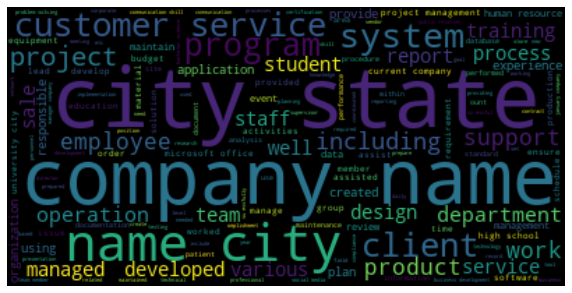

In [14]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [16]:
df_categories = [df[df['Category'] == category].loc[:, ['Resume_str', 'Category']] for category in categories]
df_categories

[                                            Resume_str    Category
 0    senior ountant summary senior ounting professi...  ACCOUNTANT
 1    ountant iii summary talented ountant employing...  ACCOUNTANT
 2    supervisor ountant professional summary abilit...  ACCOUNTANT
 3    ountant summary degreed ountant years diversif...  ACCOUNTANT
 4    staff ountant professional profile advance pro...  ACCOUNTANT
 ..                                                 ...         ...
 99   ountant summary self motivated ountant offerin...  ACCOUNTANT
 100  general ountant career focus obtain position a...  ACCOUNTANT
 101  senior ountant summary highly competent motiva...  ACCOUNTANT
 102  principal ountant summary capable ountant su e...  ACCOUNTANT
 103  payroll ountant summary strong work ethic year...  ACCOUNTANT
 
 [104 rows x 2 columns],
                                             Resume_str  Category
 104  child family advocate professional profile tal...  ADVOCATE
 105  summary administrat

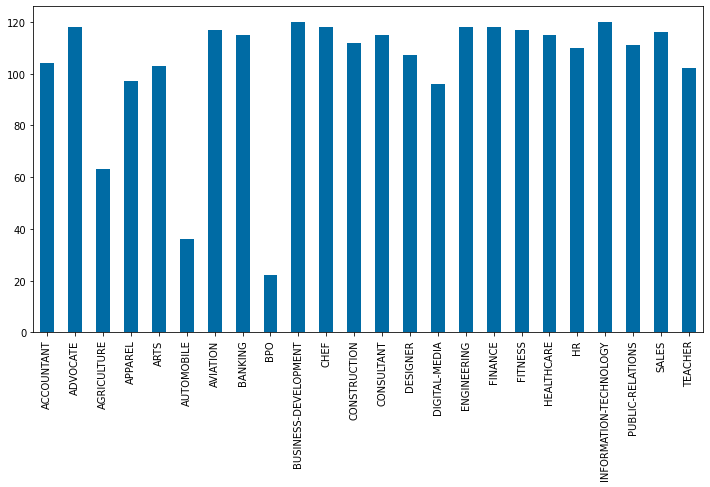

In [17]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [18]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_str'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

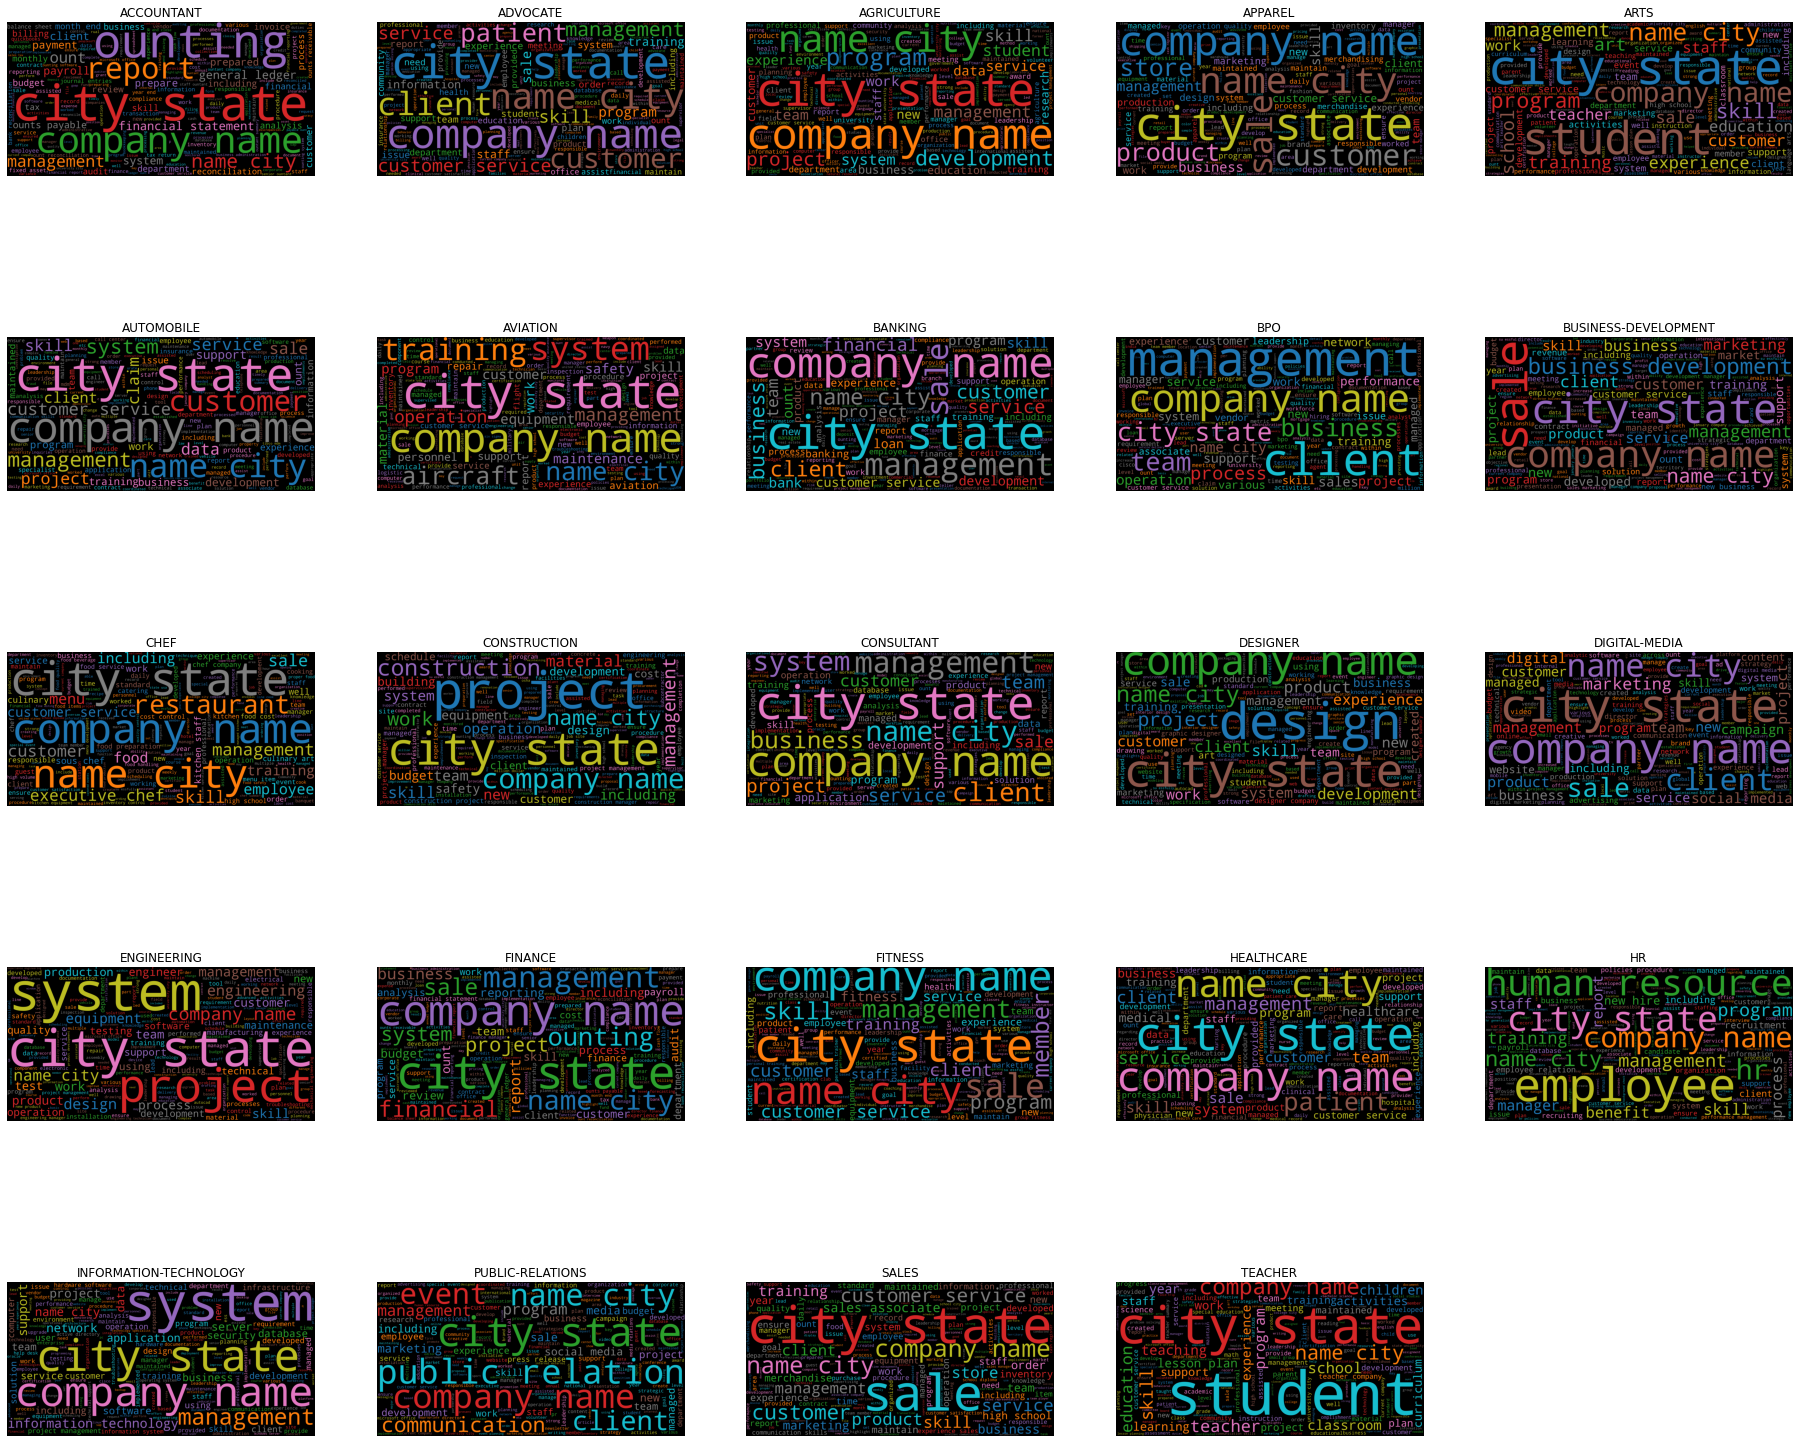

In [19]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [22]:
def wordfreq(df):
    count = df['Resume_str'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

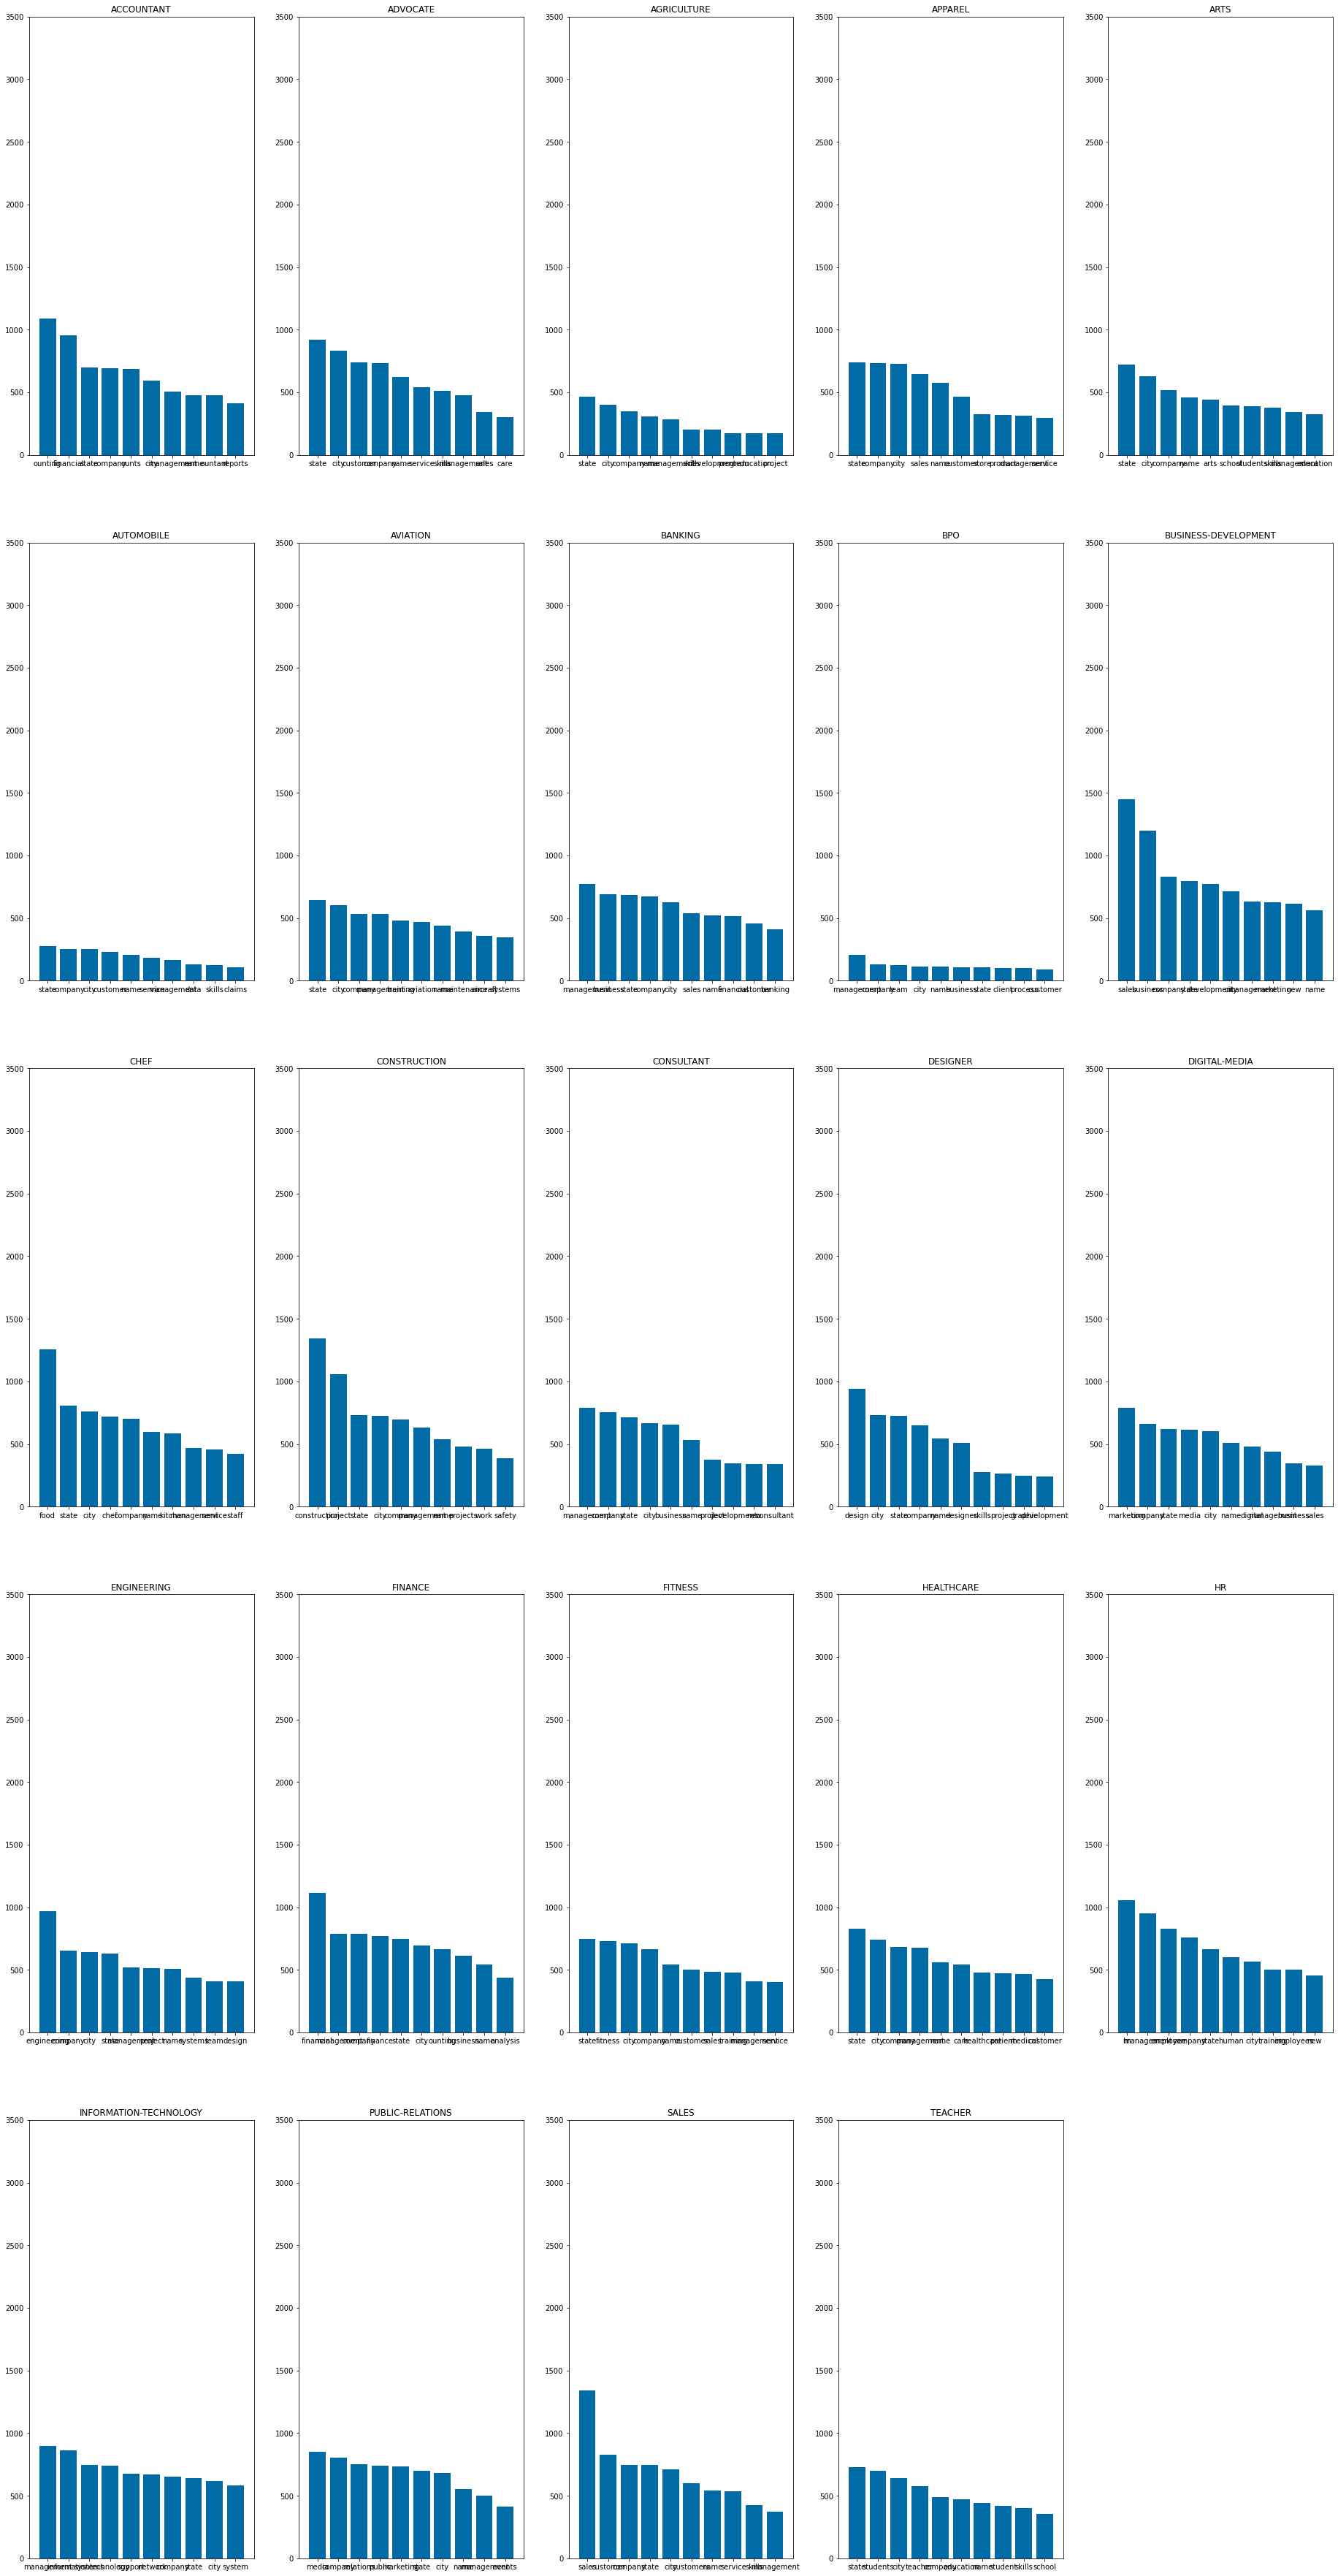

In [23]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [24]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [25]:
df

,Unnamed: 0,ID,Resume_str,Category
0,0,13701259,senior ountant summary senior ounting professi...,0
1,1,14055988,ountant iii summary talented ountant employing...,0
2,2,14126433,supervisor ountant professional summary abilit...,0
3,3,14224370,ountant summary degreed ountant years diversif...,0
4,4,14449423,staff ountant professional profile advance pro...,0
...,...,...,...,...
2465,2465,86322251,reading teacher summary highly motivated educa...,23
2466,2466,86597425,history teacher professional summary employed ...,23
2467,2467,90363254,teacher summary highly ethical dependable dili...,23
2468,2468,96547039,teacher summary talented early education profe...,23


In [26]:
df.Category.value_counts()

20    120
9     120
16    118
10    118
1     118
15    118
6     117
17    117
22    116
12    115
7     115
18    115
11    112
21    111
19    110
13    107
0     104
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: Category, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume_str'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)


Feature completed .....


In [1]:
WordFeatures

NameError: name 'WordFeatures' is not defined

In [29]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(1976, 37149)
(494, 37149)


In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.65
Accuracy of KNeighbors Classifier on test set:     0.53


In [35]:
from sklearn import metrics

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.53      0.76      0.63        21
           1       0.64      0.29      0.40        24
           2       0.60      0.23      0.33        13
           3       0.60      0.32      0.41        19
           4       0.60      0.14      0.23        21
           5       0.33      0.14      0.20         7
           6       0.71      0.43      0.54        23
           7       0.63      0.52      0.57        23
           8       0.00      0.00      0.00         4
           9       0.48      0.54      0.51        24
          10       0.89      0.71      0.79        24
          11       0.76      0.59      0.67        22
          12       0.20      0.13      0.16        23
          13       0.91      0.48      0.62        21
          14       0.52      0.63      0.57        19
          15       0.57      0.54      0.

C:\Users\taksa\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taksa\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taksa\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(dct.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(dct.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.56


In [2]:
df = pd.read_csv('Resume_Data.csv')

In [4]:
df['Resume_str'] = df['Resume_str'].apply(lambda w: preprocess(w))

In [5]:
from sklearn.utils import shuffle

features = df['Resume_str'].values
original_labels = df['Category'].values
labels = original_labels[:]

for i in range(len(df)):
    
    labels[i] = str(labels[i].lower())  # convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens
    
features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

manager highlights customer client relations advanced troubleshooting techniques project management tracking windows server windows xp vista experience manager december current company name city state stabilize manage infrastructure applications corporate remote facilities create standard hardware software lists purchased based lists create fiscal year budget department perform thorough audit proposed various changes based audit administer various information technology systems applications plan manage information technology projects define plan employee training programs internal staff maintain production database applications analyze system performance make recommendations management infrastructure upgrades changes reduce system downtime diagnosing resolving complex technology related issues negotiate vendor contracts ensure correct product lowest cost streamlined internal communication platform perform routine vulnerability risk assessments company infrastructure perform regular sec

In [6]:
train_split = 0.8
train_size = int(train_split * len(df))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

1976
494


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'state': 2, 'company': 3, 'city': 4, 'management': 5, 'name': 6, 'sales': 7, 'customer': 8, 'business': 9, 'skills': 10, 'new': 11, 'service': 12, 'team': 13, 'development': 14, 'experience': 15, 'training': 16, 'project': 17, 'work': 18, 'manager': 19, 'marketing': 20, 'information': 21, 'office': 22, 'support': 23, 'financial': 24, 'education': 25, 'including': 26, 'staff': 27, 'professional': 28, 'data': 29, 'system': 30, 'systems': 31, 'university': 32, 'managed': 33, 'process': 34, 'design': 35, 'customers': 36, 'quality': 37, 'client': 38, 'clients': 39, 'developed': 40, 'reports': 41, 'analysis': 42, 'operations': 43, 'high': 44, 'product': 45, 'program': 46, 'services': 47, 'microsoft': 48, 'current': 49, 'maintained': 50, 'ounting': 51, 'responsible': 52, 'ounts': 53, 'software': 54, 'school': 55, 'planning': 56, 'time': 57, 'procedures': 58, 'communication': 59, 'projects': 60, 'performance': 61, 'equipment': 62, 'ensure': 63, 'leadership': 64, 'needs': 65, 'daily':

In [8]:
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'information': 1, 'technology': 2, 'business': 3, 'development': 4, 'engineering': 5, 'advocate': 6, 'finance': 7, 'chef': 8, 'aviation': 9, 'fitness': 10, 'sales': 11, 'banking': 12, 'consultant': 13, 'healthcare': 14, 'construction': 15, 'public': 16, 'relations': 17, 'hr': 18, 'designer': 19, 'accountant': 20, 'arts': 21, 'teacher': 22, 'apparel': 23, 'digital': 24, 'media': 25, 'agriculture': 26, 'automobile': 27, 'bpo': 28}


In [9]:
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[  19  224    8   38   92  458  426  355   17    5  462  209  250  209
 1433 2234   15   19  614   49    3    6    4    2    1  144  703  213
  189 1386  567  235  723  348   54 1448 2567  120 1448  235 1687  136
   77   75  405 1672  455 1775   96  335  120  455 1665   96   21   78
   31  213  151  144   21   78   60 2149  151   83   16   84  177   27
   98  101  160  213  600   30   61  468  648    5  703 1191  335 1106
   30 3457    1  955  378   78  190   71 1917  376  291   63  756   45
 5665  155 1688  177   59  884  405 1428    1  359  885    3  703  405
 1038  169  602  177  703  213  126 1742  620 2150  301   30  832  172
  144  189  429  526  338    1 1424   18   96  403  418   78   65  105
  188  333   23   22 1386  695  140   73  357  548  614    3    6    4
    2  144   13  274  753 1673   63  149    8  271 2205 1112  398   39
   98  550 2053 5163 1673   18 1673  418  756 1112 2963 3732 1665   96
   21   78   31  213  600   30   61  468  648    5  703 1191  335   98
  902 

In [ ]:
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

In [48]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_feature_padded = np.array(train_feature_padded, dtype=object)
test_feature_padded = np.array([test_feature_padded], dtype=object)

train_label_sequences = np.array([train_label_sequences], dtype=object)
test_label_sequences = np.array([test_label_sequences], dtype=object)

In [49]:
test_feature_padded

array([[[[[110, 19, 151, ..., 484, 908, 44],
          [86, 906, 28, ..., 449, 744, 207],
          [438, 1, 89, ..., 1, 1504, 461],
          ...,
          [5803, 1681, 19, ..., 69, 104, 471],
          [131, 404, 186, ..., 798, 1252, 123],
          [78, 17, 45, ..., 17, 5, 290]]]]], dtype=object)

In [40]:
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).